In [ ]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [ ]:
colors = ['#cb17eb','#A4EB17', '#17EBC8', '#EB173A', '#ffde59']  
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

palette = ['#cb17eb','#A4EB17', '#17EBC8', '#EB173A', '#ffde59', '#ccff33', '#ff36ab', '#e0fbfc', '#3772ff', '#45062e']  
sns.set_palette(palette)

In [ ]:
path = r"C:\Users\Rudra\Desktop\rural-financial-inclusion-govt-scheme-recommendation\parquet-data\lev-14\data2\lev_14_mp.parquet"

pdf = pl.read_parquet(path)
pdf.collect_schema()

Schema([('Survey_Name', String),
        ('Year', String),
        ('FSU_Serial_No', String),
        ('Sector', String),
        ('State', String),
        ('NSS_Region', String),
        ('District', String),
        ('Stratum', String),
        ('Sub_stratum', String),
        ('Panel', String),
        ('Sub_sample', String),
        ('FOD_Sub_Region', String),
        ('Sample_SU_No', String),
        ('Sample_Sub_Division_No', String),
        ('Second_Stage_Stratum_No', String),
        ('Sample_Household_No', String),
        ('Questionnaire_No', String),
        ('Level', String),
        ('SECTION', String),
        ('ITEM_CODE', String),
        ('VALUE_RS', Int64),
        ('MULTIPLIER', Int64)])

In [ ]:
pdf = pdf.filter(
    pl.col('State') == '23'
)

In [ ]:
cols = ['ITEM_CODE', 'VALUE_RS']

pdf = pdf[cols]

pdf 

ITEM_CODE,VALUE_RS
str,i64
"""139""",96
"""139""",82
"""139""",40
"""139""",80
"""139""",40
…,…
"""219""",237
"""239""",60
"""249""",14


In [ ]:
pdf.null_count()

ITEM_CODE,VALUE_RS
u32,u32
0,0


In [ ]:
pdf = pdf.with_columns(
    [pl.col(col).cast(pl.Int16, strict=False) for col in pdf.columns]
)

pdf.null_count()

ITEM_CODE,VALUE_RS
u32,u32
0,5152


In [ ]:
pdf = pdf.fill_null(strategy='forward')

In [ ]:
print(f"Number of Item present {pdf['ITEM_CODE'].approx_n_unique()}")

Number of Item present 42


In [ ]:
pdf['ITEM_CODE'].unique().to_list()

[99,
 129,
 139,
 159,
 169,
 179,
 189,
 199,
 219,
 239,
 249,
 269,
 279,
 289,
 299,
 309,
 319,
 329,
 349,
 379,
 389,
 399,
 409,
 419,
 429,
 439,
 459,
 479,
 499,
 519,
 529,
 539,
 559,
 569,
 579,
 599,
 609,
 619,
 629,
 639,
 649,
 899]

In [ ]:
pdf.columns

['ITEM_CODE', 'VALUE_RS']

In [ ]:
pdf.estimated_size(unit='mb')

3.5552902221679688

In [ ]:
df = pdf.to_pandas()

In [ ]:
category_mapping = {
    129: "cereals",
    139: "cereal substitute",
    159: "pulses & products",
    179: "salt & sugar",
    169: "milk & milk products",
    219: "vegetables",
    239: "fruits (fresh)",
    249: "fruits (dry)",
    199: "egg, fish & meat",
    189: "edible oil",
    269: "spices",
    279: "beverages",
    289: "served processed food",
    299: "packaged processed food"
}


df['category'] = df['ITEM_CODE'].map(category_mapping)

In [ ]:
df['category'].value_counts()

category
beverages                  28052
salt & sugar               28004
pulses & products          27944
vegetables                 27934
edible oil                 27932
spices                     27926
cereals                    27890
packaged processed food    27834
milk & milk products       27648
fruits (fresh)             27234
served processed food      26592
fruits (dry)               23794
egg, fish & meat           14530
cereal substitute           6064
Name: count, dtype: int64

In [ ]:
df['category'].describe()

count        349378
unique           14
top       beverages
freq          28052
Name: category, dtype: object

# Functions

In [ ]:
def auto_label_and_plot(col_name:str, map_dictionary:dict):
    df[col_name] = df['ITEM_CODE'].map(map_dictionary)
    
    display(df[col_name].value_counts())
    display(df[col_name].describe())
    


#  Category Mapping

category
beverages                  28052
salt & sugar               28004
pulses & products          27944
vegetables                 27934
edible oil                 27932
spices                     27926
cereals                    27890
packaged processed food    27834
milk & milk products       27648
fruits (fresh)             27234
served processed food      26592
fruits (dry)               23794
egg, fish & meat           14530
cereal substitute           6064
Name: count, dtype: int64

count        349378
unique           14
top       beverages
freq          28052
Name: category, dtype: object

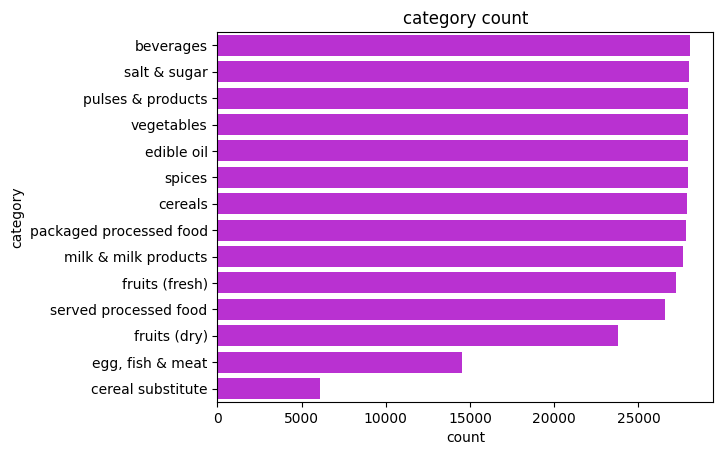

In [ ]:
category_mapping = {
    129: "cereals",
    139: "cereal substitute",
    159: "pulses & products",
    179: "salt & sugar",
    169: "milk & milk products",
    219: "vegetables",
    239: "fruits (fresh)",
    249: "fruits (dry)",
    199: "egg, fish & meat",
    189: "edible oil",
    269: "spices",
    279: "beverages",
    289: "served processed food",
    299: "packaged processed food"
}

auto_label_and_plot(col_name='category', map_dictionary=category_mapping)

# Served Food 

Series([], Name: count, dtype: int64)

count       0
unique      0
top       NaN
freq      NaN
Name: served_food_category, dtype: object

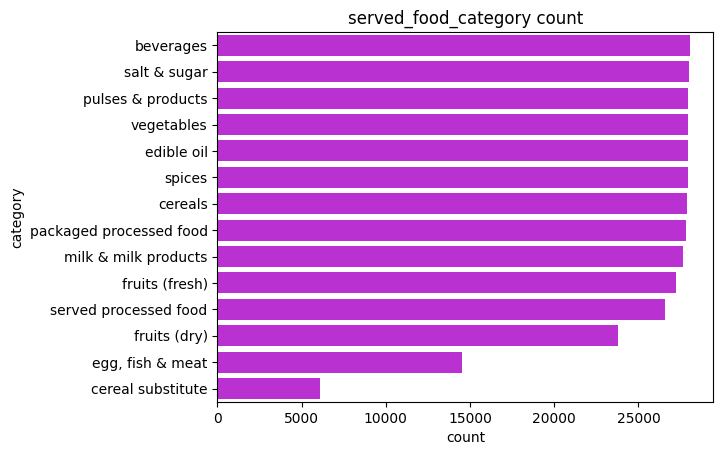

In [ ]:
served_processed_mapping = {
    76: "cooked meals purchased at subsidized rate",
    280: "cooked meals purchased",
    281: "cooked meals received free in workplace",
    282: "cooked meals received as assistance",
    283: "cooked snacks purchased",
    284: "other served processed food",
    # 289: "served processed food: sub-total"
}

auto_label_and_plot(col_name='served_food_category', map_dictionary=served_processed_mapping)

In [ ]:
cereal_mapping = {
    61: "rice-free",
    62: "wheat/atta-free",
    70: "coarse grains-free",
    101: "rice – PDS",
    102: "rice – other sources",
    103: "chira",
    105: "muri",
    106: "other rice products (khoi/lawa, etc.)",
    107: "wheat/atta – PDS",
    108: "wheat/atta – other sources",
    110: "maida",
    111: "suji/rawa",
    112: "vermicelli (sewai)",
    114: "other wheat products",
    1: "coarse grains – PDS",
    2: "coarse grains – other sources",
    122: "other cereals & products",
    #129: "cereals: sub-total",
    #139: "cereal substitutes (tapioca, etc.)"
}


auto_label_and_plot(col_name='cereal_category', map_dictionary=cereal_mapping )